In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import scipy
import scipy.linalg as linalg

In [2]:
np.set_printoptions(precision=5,suppress=True)

# Example for Regression with p>n
We consider our toy example with three data points.

In [3]:
D = np.array([5,3,1])
y = np.array([2,5,3])
pandas.DataFrame({"D":D,"y":y})

,D,y
0,5,2
1,3,5
2,1,3


We fit a polynomial of degree $k=3$. For polynomial regression functions $f:\mathbb{R}\rightarrow\mathbb{R}$ we have
$$f(x) = \beta_0 +\beta_1 x+ \beta_2x^2 + \beta_3x^3 = \phi(x)^\top\beta,$$
where 
$$\phi(x)=\begin{pmatrix}1\\ x\\ x^2\\ x^3\end{pmatrix}.$$
We implement $\phi$ and create the design matrix. Note that the following definition of $\phi$ for polynomials is only correct if the dimensionality of the feature space is equal to one, as it is in this example.

In [4]:
def ϕ(x):
    return np.row_stack((np.ones(x.shape[0]),x, x**2, x**3))

The design matrix gathers the transposed feature vectors of the data matrix:
$$X = \begin{pmatrix} \phi^\top(5)\\ \phi^\top(3)\\ \phi^\top(1)\end{pmatrix}$$

In [5]:
X=ϕ(D).T
X

array([[  1.,   5.,  25., 125.],
       [  1.,   3.,   9.,  27.],
       [  1.,   1.,   1.,   1.]])

In [6]:
n,p = X.shape
print("(n,p)=({},{})".format(n,p))

(n,p)=(3,4)


We try to solve the system of linear equations which returns the global minimizers $\beta$ of the regression objective
$$\{\beta\in\mathbb{R}^p\mid X^\top X\beta = X^\top y\}.$$

In [7]:
β = linalg.solve(X.T@X,X.T@y)
β

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=2.30128e-19): result may not be accurate.
  """Entry point for launching an IPython kernel.


array([ 1.82422,  0.89453,  0.39453, -0.11328])

This gives a warning because $X^\top X$ is not invertible. So let's try to implement the formula for non-invertible $X^\top X$ from the lecture. Therefore, we need the SVD of $X$.

In [8]:
U,σs,Vt = linalg.svd(X)
print(U.shape, σs.shape, Vt.shape)

(3, 3) (3,) (4, 4)


In [9]:
V=Vt.T

We calculate $r$, the number of nonzero singular values. If $r<p$, then the matrix $X^\top X$ is not invertible.

In [10]:
r=(σs>0).sum()
r

3

We construct the $n\times p$ matrix $\Sigma$ from the denoted $n<p$ singular values.

In [11]:
Σ = np.column_stack((np.diag(σs),np.zeros(3)))
Σ

array([[130.69682,   0.     ,   0.     ,   0.     ],
       [  0.     ,   4.19889,   0.     ,   0.     ],
       [  0.     ,   0.     ,   0.84299,   0.     ]])

In [12]:
ΣtΣ = Σ.T@Σ
ΣtΣ

array([[17081.65872,     0.     ,     0.     ,     0.     ],
       [    0.     ,    17.63064,     0.     ,     0.     ],
       [    0.     ,     0.     ,     0.71064,     0.     ],
       [    0.     ,     0.     ,     0.     ,     0.     ]])

If we did everything right, then we should get $X=U\Sigma V^\top$.

In [13]:
U@Σ@Vt

array([[  1.,   5.,  25., 125.],
       [  1.,   3.,   9.,  27.],
       [  1.,   1.,   1.,   1.]])

In [14]:
X

array([[  1.,   5.,  25., 125.],
       [  1.,   3.,   9.,  27.],
       [  1.,   1.,   1.,   1.]])

We can now calculate a $\beta$ in the set of global minimizers. If ```random=True``` then a random matrix replaces the zero rows in the pseudo inverse of $\Sigma^\top\Sigma$.

In [15]:
def get_beta(random =True):
    ΣtΣ_p = Σ.T@Σ
    ΣtΣ_p[ΣtΣ_p>0] = 1/ΣtΣ_p[ΣtΣ_p>0]
    A=ΣtΣ_p
    if random:
        A[r:p,:]=np.random.rand(p-r,p)
    return V@A@Σ.T@U.T@y

Plot it! The function resulting from setting ```random=False``` is the one in blue.

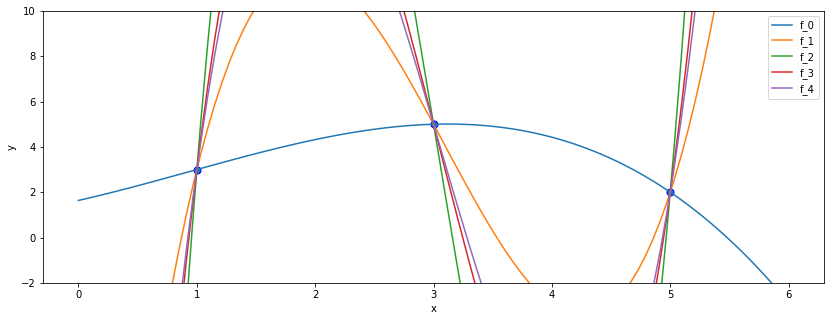

In [23]:
plt.figure(figsize=(14, 5))
x = np.linspace(0, 6, 100)
β = get_beta(random = False)
f_x = ϕ(x).T@β
plt.plot(x, f_x, label="f_0")
for i in range(1,5):
    β = get_beta()
    f_x = ϕ(x).T@β
    plt.plot(x, f_x, label="f_"+str(i))
plt.scatter(D, y, edgecolor='b', s=50)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim((-2, 10))
plt.legend(loc="best")
plt.show()

In [17]:
get_beta(random = False)

array([ 1.63666,  1.18212,  0.282  , -0.10078])

In [19]:
get_beta(random = True)

array([-45.6257 ,  73.65107, -28.07542,   3.05005])